In [2]:
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import sys
from keras.utils import np_utils

2.3.0


In [3]:
(X_train, Y_class_train), (X_test, Y_class_test) = mnist.load_data()

In [4]:
print("학습셋 이미지 수 : %d 개"%(X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개"%(X_test.shape[0]))

학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


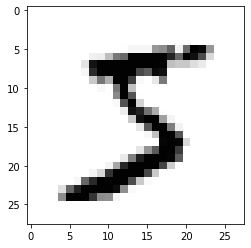

In [5]:
plt.imshow(X_train[0], cmap = 'Greys')
plt.show()

In [6]:
import sys

for x in X_train[0] :
    for i in x :
        sys.stdout.write('%d '%i)
    sys.stdout.write('\n')

0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 3 18 18 18 126 136 175 26 166 255 247 127 0 0 0 0 
0 0 0 0 0 0 0 0 30 36 94 154 170 253 253 253 253 253 225 172 253 242 195 64 0 0 0 0 
0 0 0 0 0 0 0 49 238 253 253 253 253 253 253 253 253 251 93 82 82 56 39 0 0 0 0 0 
0 0 0 0 0 0 0 18 219 253 253 253 253 253 198 182 247 241 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 80 156 107 253 253 205 11 0 43 154 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 14 1 154 253 90 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 139 253 190 2 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 11 190 253 70 0 0 0 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 35 241 225 160 108 1 0 0 0 0 0 0 0 0 0 0 
0 0 0 0 0 0 0 0 0 0 0 0 0 81 240 253 253 119 25 0 0 0 0 0 0 0 0 0 


In [7]:
X_train = X_train.reshape(X_train.shape[0], 784)

In [8]:
X_train = X_train.astype('float64')
X_train = X_train / 255

X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255

In [9]:
print("class : %d"%(Y_class_train[0]))

class : 5


In [10]:
Y_train = np_utils.to_categorical(Y_class_train,10)
Y_test = np_utils.to_categorical(Y_class_test,10)

In [11]:
print(Y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]



Epoch 00001: val_loss improved from inf to 0.15296, saving model to ./model2\01-0.1530.hdf5

Epoch 00002: val_loss improved from 0.15296 to 0.10515, saving model to ./model2\02-0.1052.hdf5

Epoch 00003: val_loss improved from 0.10515 to 0.08143, saving model to ./model2\03-0.0814.hdf5

Epoch 00004: val_loss improved from 0.08143 to 0.07662, saving model to ./model2\04-0.0766.hdf5

Epoch 00005: val_loss improved from 0.07662 to 0.06768, saving model to ./model2\05-0.0677.hdf5

Epoch 00006: val_loss improved from 0.06768 to 0.06757, saving model to ./model2\06-0.0676.hdf5

Epoch 00007: val_loss improved from 0.06757 to 0.06127, saving model to ./model2\07-0.0613.hdf5

Epoch 00008: val_loss did not improve from 0.06127

Epoch 00009: val_loss improved from 0.06127 to 0.06000, saving model to ./model2\09-0.0600.hdf5

Epoch 00010: val_loss did not improve from 0.06000

Epoch 00011: val_loss did not improve from 0.06000

Epoch 00012: val_loss did not improve from 0.06000

Epoch 00013: val_lo

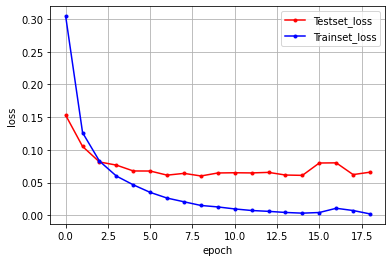

In [11]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint,EarlyStopping

import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(seed)

# MNIST 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

# 모델 프레임 설정
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 모델 실행 환경 설정
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 최적화 설정
MODEL_DIR = './model2/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model2/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [12]:
from keras.models import load_model

model.save('model2/my_model_cnn.h5')